In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from catboost import CatBoostClassifier, Pool
from sklearn.utils.class_weight import compute_class_weight
import re



# **Exploratory Data Analysis (EDA):**


*  Statistical summary.
*  Data visualization to understand feature distributions and correlations.



In [6]:
#Load the Data
Learning_styles=pd.read_csv('contentSL_csv.csv')

# Display the first few rows of the dataset to understand its structure
Learning_styles.head()

,Gender,Age,I learn better by reading what the teacher writes on the chalkboard.,"When I read instructions, I remember them better.",I understand better when I read instructions.,I learn better by reading than by listening to someone.,I learn more by reading textbooks than by listening to lectures.,When the teacher tells me the instructions I understand better,"When someone tells me how to do something in class, I learn it better.",I remember things I have heard in class better than things I have read.,I learn better in class when the teacher gives a lecture.,I learn better in class when I listen to someone.,I prefer to learn by doing something in class.,"When I do things in class, I learn better.",I enjoy learning in class by doing experiments.,I understand things better in class when I participate in role-playing.,I learn more effectively in class when I engage in scenario-based activities.,Learner
0,Male,16,3,3,4,3,2,4,3,3,2,3,4,2,2,3,3,K
1,Male,16,5,4,4,4,3,3,2,4,3,4,3,4,3,4,4,A
2,Male,18,3,4,3,3,4,2,4,3,2,2,3,2,3,3,3,A
3,Male,21,1,3,3,4,4,2,2,2,2,2,4,4,4,4,5,K
4,Female,21,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3,A


In [7]:
#Dimention/Size of dataset
Learning_styles.shape

(1210, 18)

In [8]:
# Summary statistics of the dataset
summary_statistics = Learning_styles.describe(include='all')
summary_statistics

,Gender,Age,I learn better by reading what the teacher writes on the chalkboard.,"When I read instructions, I remember them better.",I understand better when I read instructions.,I learn better by reading than by listening to someone.,I learn more by reading textbooks than by listening to lectures.,When the teacher tells me the instructions I understand better,"When someone tells me how to do something in class, I learn it better.",I remember things I have heard in class better than things I have read.,I learn better in class when the teacher gives a lecture.,I learn better in class when I listen to someone.,I prefer to learn by doing something in class.,"When I do things in class, I learn better.",I enjoy learning in class by doing experiments.,I understand things better in class when I participate in role-playing.,I learn more effectively in class when I engage in scenario-based activities.,Learner
count,1210,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K
freq,616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,679
mean,NaN,18.606612,3.290909,3.458678,3.359504,3.300826,3.234711,3.478512,3.438843,3.335537,3.273554,3.385124,3.520661,3.587603,3.633058,3.405785,3.512397,NaN
std,NaN,2.110423,1.115942,0.983921,1.009719,1.056900,1.116588,1.010262,1.025713,1.082140,1.057665,1.043524,1.127146,1.044587,1.120926,1.037653,0.991408,NaN
min,NaN,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,17.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
50%,NaN,19.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,NaN
75%,NaN,20.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,NaN


In [9]:
Learning_styles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 18 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Gender                                                                         1210 non-null   object
 1   Age                                                                            1210 non-null   int64 
 2   I learn better by reading what the teacher writes on the chalkboard.           1210 non-null   int64 
 3   When I read instructions, I remember them better.                              1210 non-null   int64 
 4   I understand better when I read instructions.                                  1210 non-null   int64 
 5   I learn better by reading than by listening to someone.                        1210 non-null   int64 
 6   I learn more by reading textbook

In [10]:
# Check for missing values
missing_values = Learning_styles.isnull().sum()

missing_values

,0
Gender,0
Age,0
I learn better by reading what the teacher writes on the chalkboard.,0
"When I read instructions, I remember them better.",0
I understand better when I read instructions.,0
I learn better by reading than by listening to someone.,0
I learn more by reading textbooks than by listening to lectures.,0
When the teacher tells me the instructions I understand better,0
"When someone tells me how to do something in class, I learn it better.",0
I remember things I have heard in class better than things I have read.,0


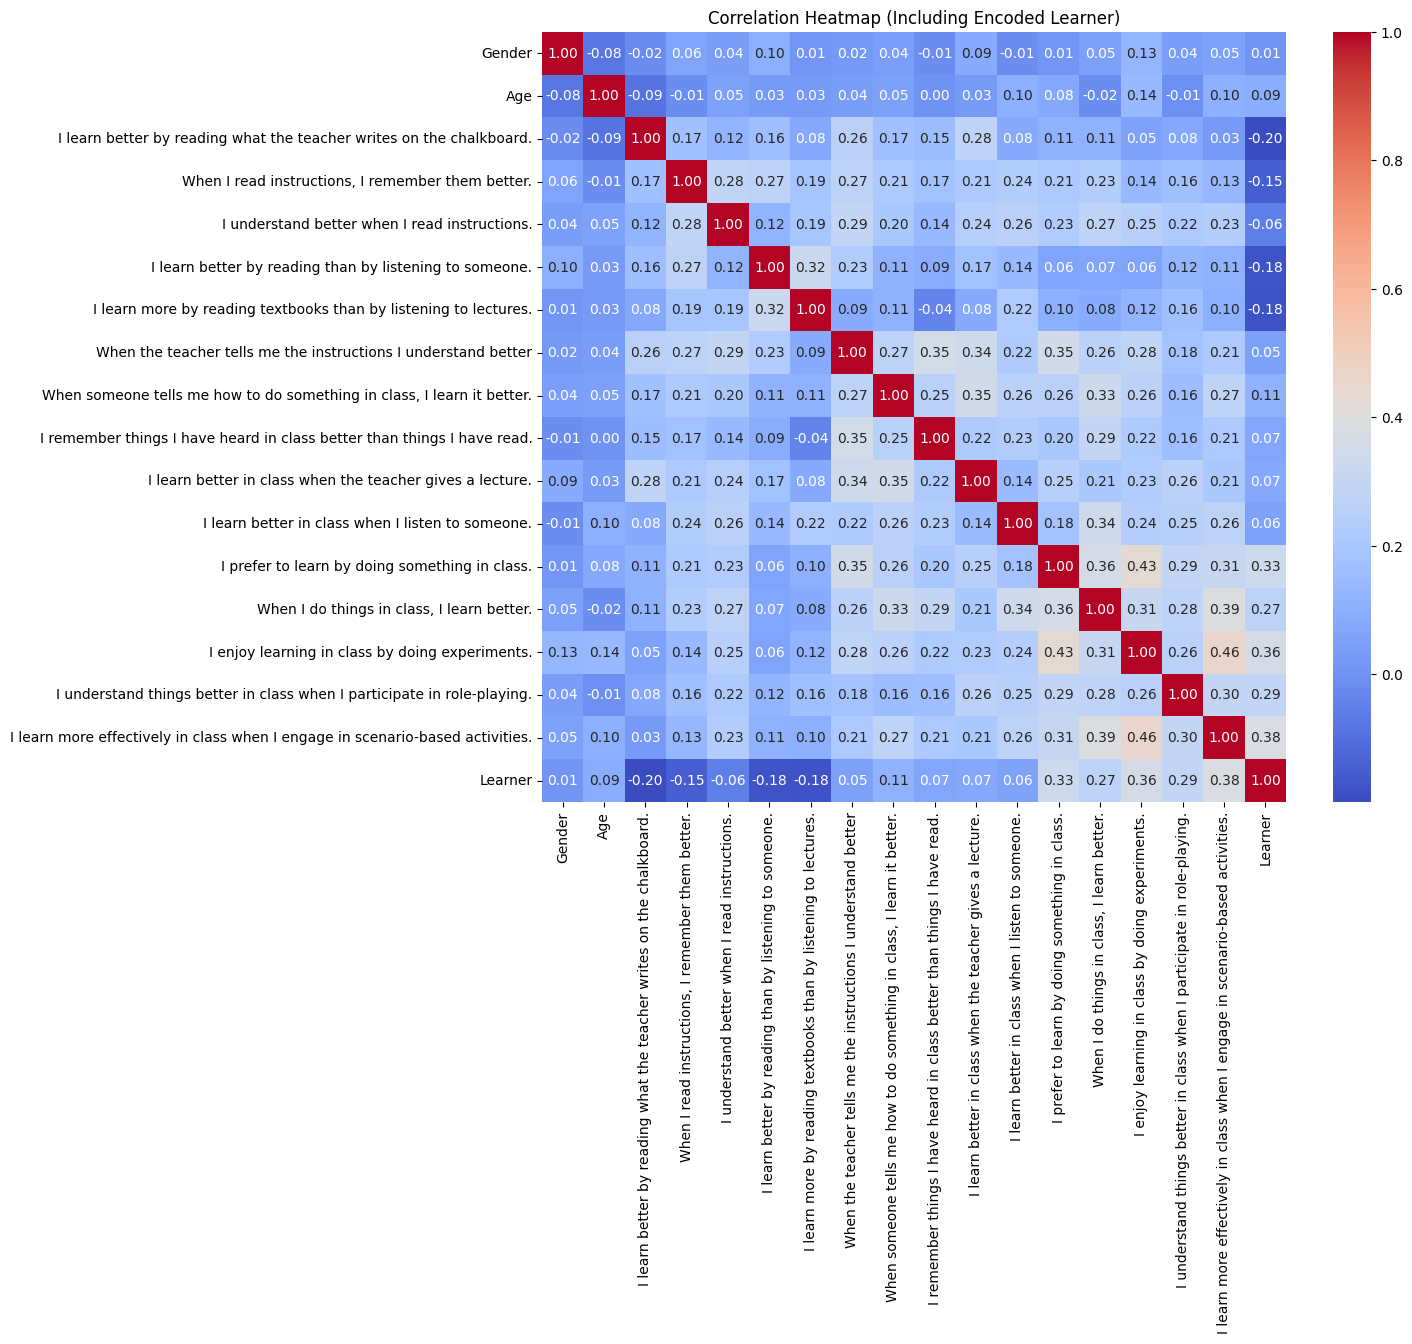

In [11]:
# Step 1: Create a temporary copy of the dataset for numeric operations
temp_data = Learning_styles.copy()

# Step 2: Temporarily encode 'Gender' for correlation calculation
temp_data['Gender'] = temp_data['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Temporarily encode the target variable 'Learner' (if not numeric)
# Assuming 'Learner' contains categorical data (e.g., 'Visual', 'Auditory', 'Kinesthetic')
temp_data['Learner'] = temp_data['Learner'].map({'A': 0, 'V': 1,'K': 2})

# Step 4: Compute the correlation matrix for numeric columns only
correlation_matrix = temp_data.select_dtypes(include=['int64', 'float64']).corr()

# Step 5: Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Including Encoded Learner)')
plt.show()




**Histogram for numerical features**

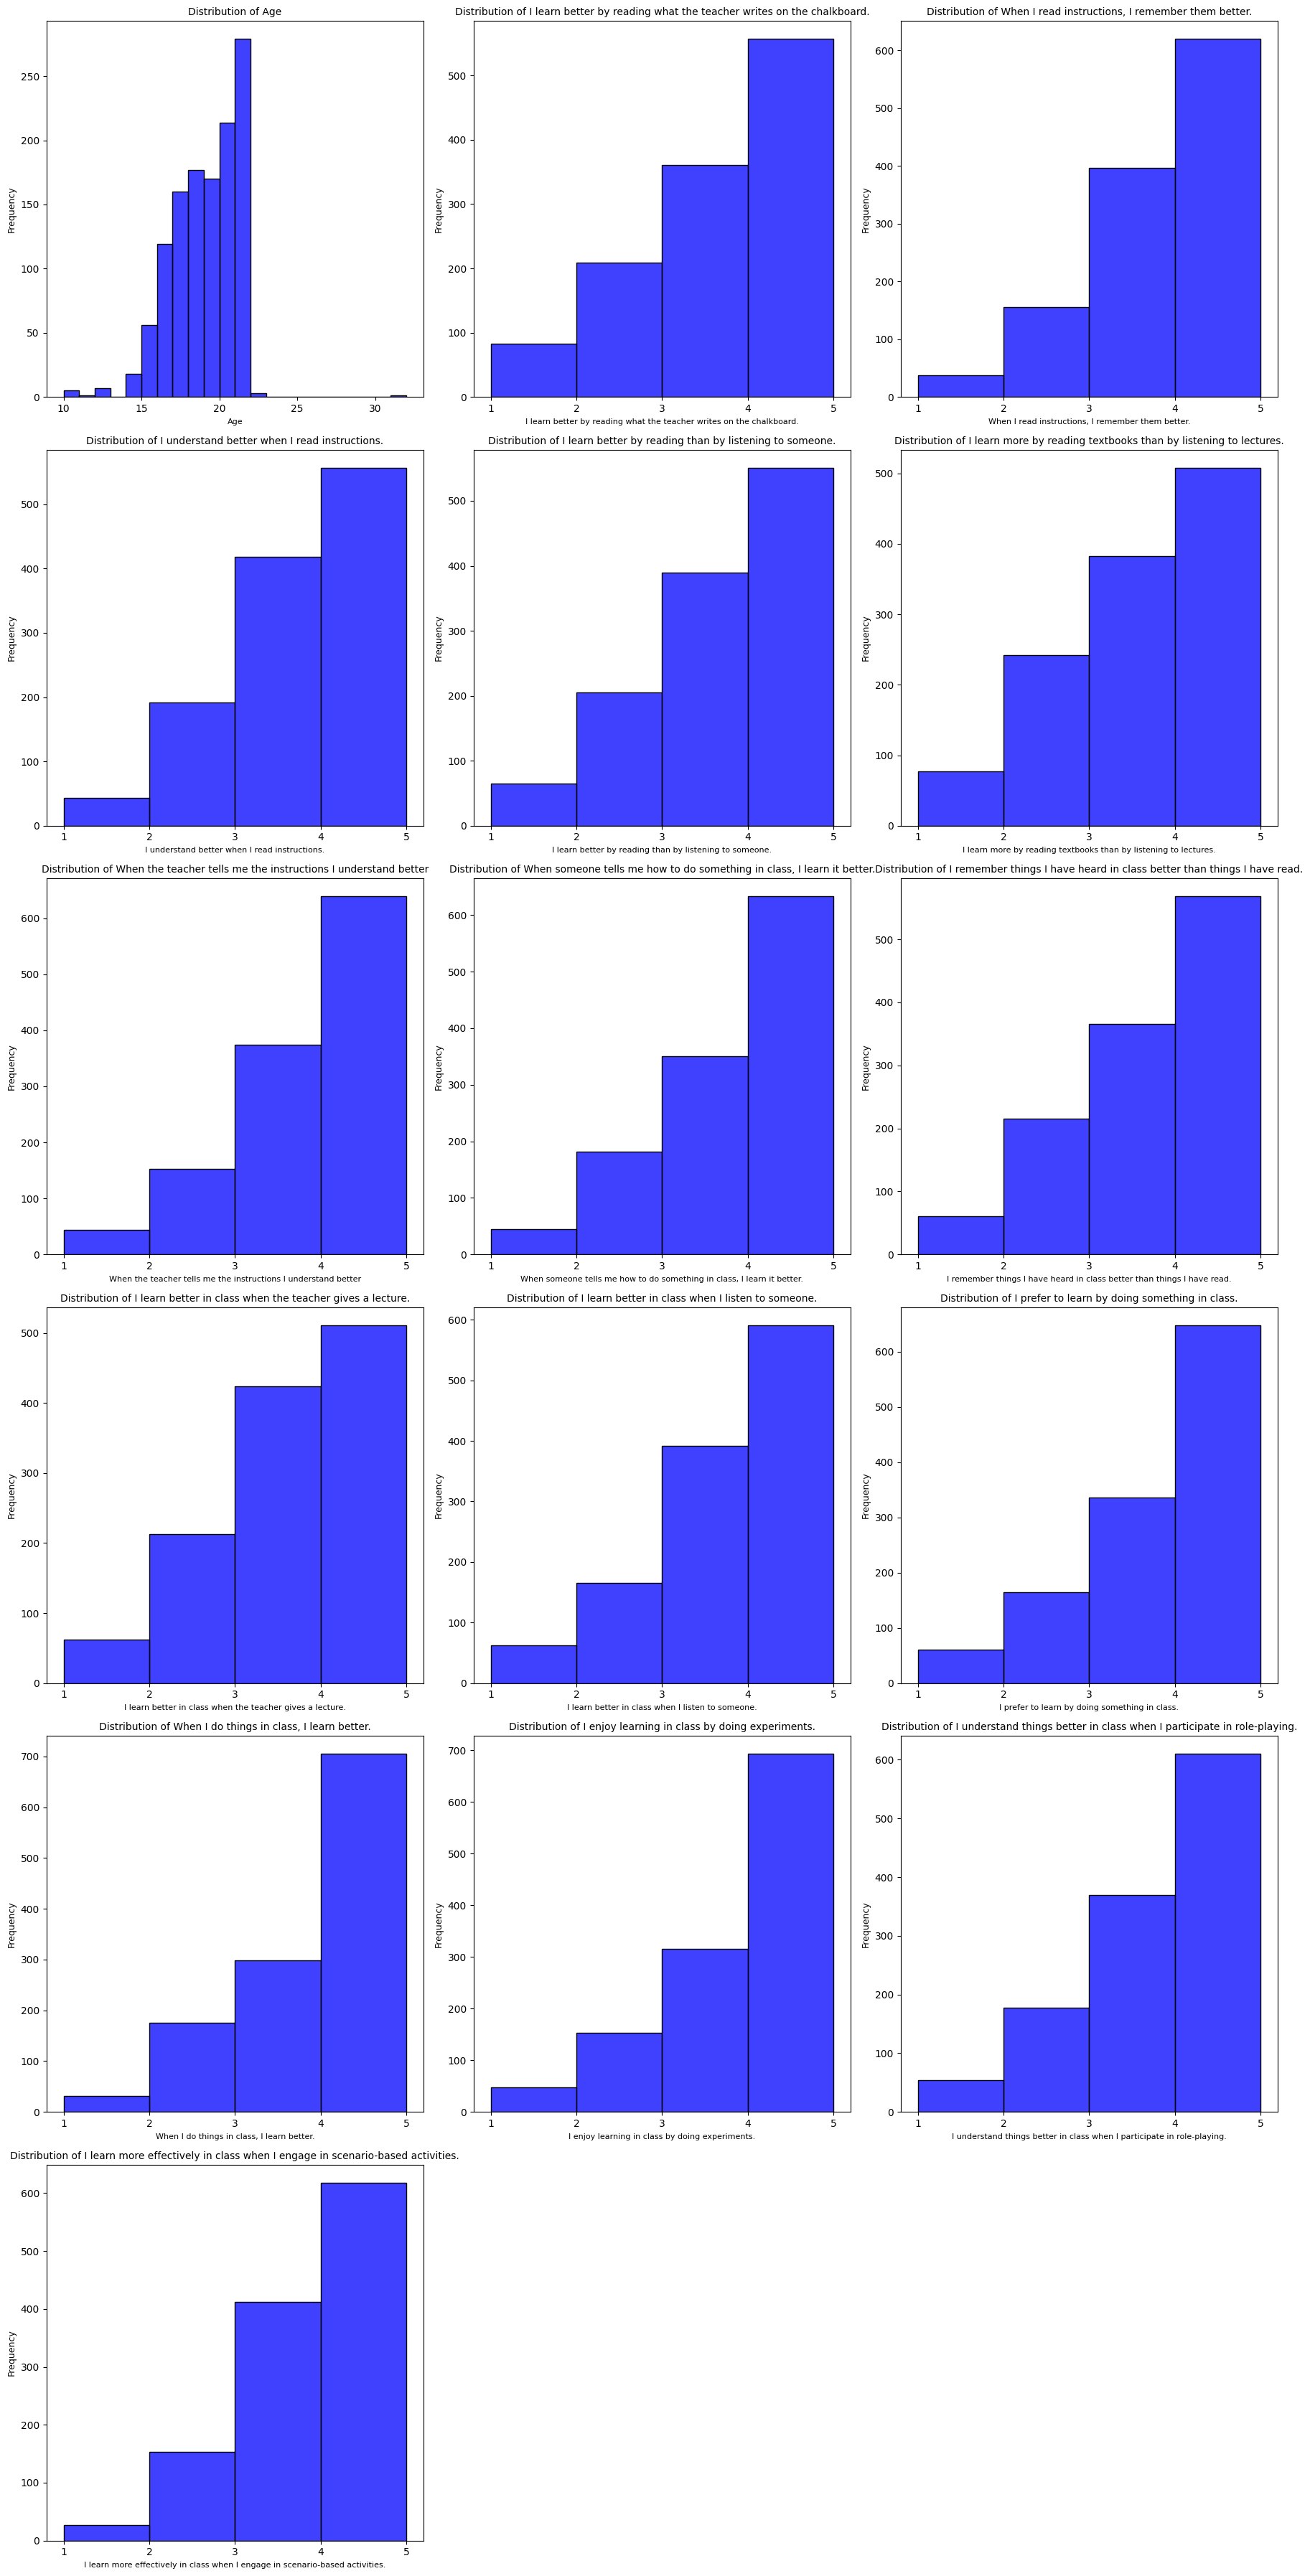

In [12]:
# Select all numeric features in the dataset
numerical_features = Learning_styles.select_dtypes(include=['int64', 'float64']).columns

# Define the number of rows and columns for the grid
n = len(numerical_features)
cols = 3  # Number of columns in the grid
rows = (n // cols) + (n % cols > 0)  # Calculate rows needed

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each numerical feature and create a histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(Learning_styles[feature], kde=False, bins=10, color='blue', ax=axes[i],
                 element='bars', binwidth=1)  # Adjust binwidth as needed
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i].set_xlabel(feature, fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=9)

    # Set x-ticks for Likert-scale features (if applicable)
    if Learning_styles[feature].nunique() <= 5:  # Adjust for discrete features
        axes[i].set_xticks([1, 2, 3, 4, 5])

# Hide any unused subplots (if number of features is not a multiple of grid columns)
for j in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing to prevent overlap
plt.tight_layout()

plt.show()


**Scatter Plot**

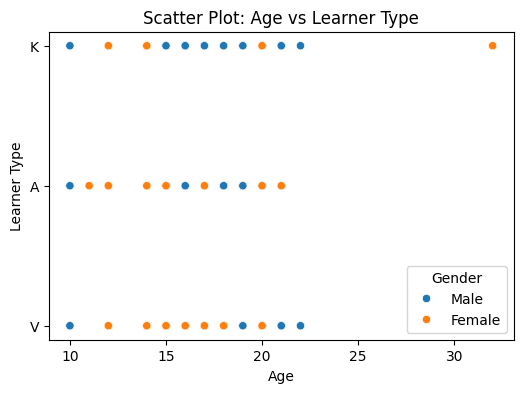

In [13]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=Learning_styles['Age'], y=Learning_styles['Learner'], hue=Learning_styles['Gender'])
plt.title('Scatter Plot: Age vs Learner Type')
plt.xlabel('Age')
plt.ylabel('Learner Type')
plt.show()


# **Implementation**

**Preprocessing**

The goal of preprocessing is to ensure our data is clean, consistent, and in a form that the machine learning model can effectively use.

In [14]:
# Encoding: Convert "Gender" & "Learner" to Numeric values
Learning_styles['Gender'] = Learning_styles['Gender'].map({'Female': 0, 'Male': 1})
Learning_styles['Learner'] = Learning_styles['Learner'].map({'A': 0, 'V': 1,'K': 2})

# Separate Features (X) and Target class (y)
X = Learning_styles.drop('Learner', axis=1)  # Features
y = Learning_styles['Learner']  # Target


Learner
2    679
0    286
1    245
Name: count, dtype: int64


<ipython-input-15-8379b527fbac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


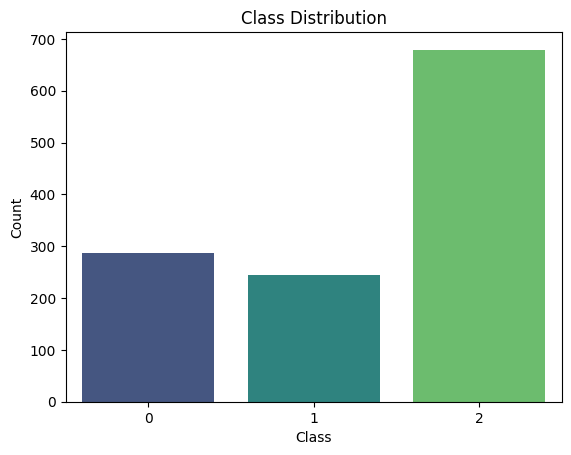

In [15]:
# Check class distribution
class_counts = Learning_styles['Learner'].value_counts()
print(class_counts)

sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [16]:
def clean_feature_names(X): return X.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '',x))
# Split the dataset into training (75%) and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])





Training set size: 907
Test set size: 303


In [17]:
# Initialize CatBoost model for feature selection
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

**Feture Selection**


Feature Importances:
                                               Feature  Importance
2   I learn better by reading what the teacher wri...    8.568821
6   I learn more by reading textbooks than by list...    8.568431
9   I remember things I have heard in class better...    8.192603
12     I prefer to learn by doing something in class.    7.477924
14    I enjoy learning in class by doing experiments.    6.748232
16  I learn more effectively in class when I engag...    6.530706
11  I learn better in class when I listen to someone.    6.339268
15  I understand things better in class when I par...    6.205362
10  I learn better in class when the teacher gives...    5.984357
8   When someone tells me how to do something in c...    5.949308
7   When the teacher tells me the instructions I u...    5.664296
3   When I read instructions, I remember them better.    5.653923
5   I learn better by reading than by listening to...    5.216976
13         When I do things in class, I learn better.

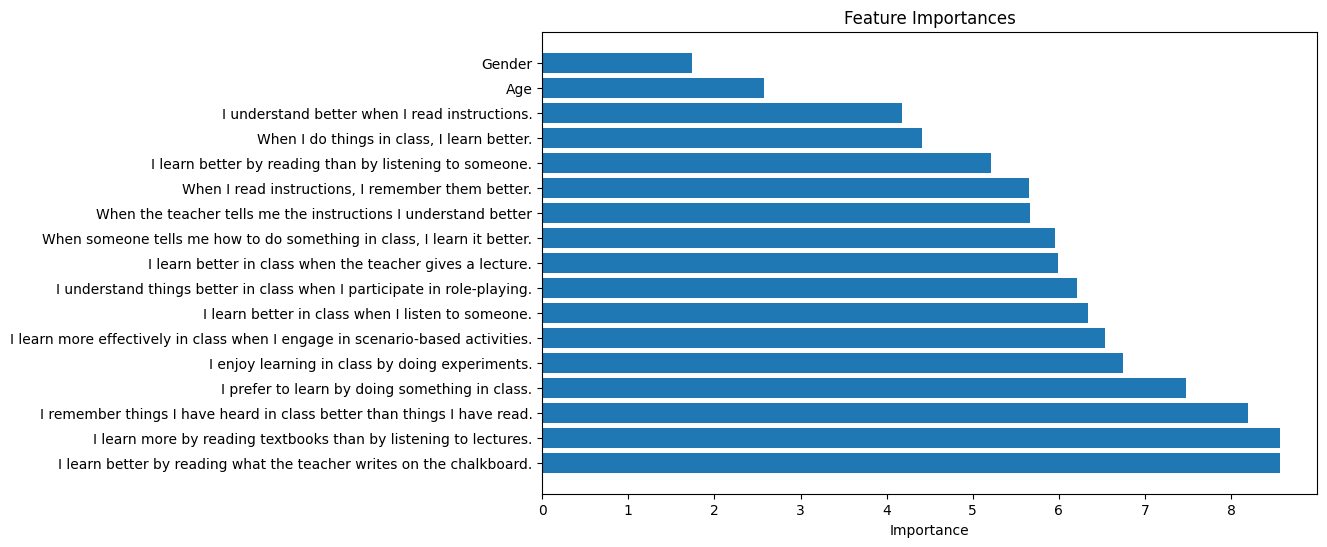

In [18]:

# Train the model for feature importance
catboost_model.fit(X_train, y_train)

# Create a Pool object from the training data
train_pool = Pool(data=X_train, label=y_train)

# Feature selection using Tree-based feature importance
feature_importances = catboost_model.get_feature_importance(data=train_pool)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

**Eliminating least imprtance feature**

In [19]:
# Set a threshold for feature importance
importance_threshold = 3

# Identify important features
important_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature']

# Transform the data to keep only important features
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Check number of features
print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features: {X_train_reduced.shape[1]}")

# Clean the reduced feature names
X_train_reduced = clean_feature_names(X_train_reduced)
X_test_reduced = clean_feature_names(X_test_reduced)


Original number of features: 17
Reduced number of features: 15


**Train & Test** **baseline model ( untuned )**

In [36]:
# Train the baseline model on reduced features
baseline_model = CatBoostClassifier(random_state=42, verbose=0, iterations=100)
baseline_model.fit(X_train_reduced, y_train)

# Predict and evaluate the baseline model
y_pred_baseline = baseline_model.predict(X_test_reduced)



**Evaluate the baseline model**

In [38]:
# Evaluate baseline model performance
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Model Accuracy: {accuracy_baseline * 100:.2f}%")
# Classification report for baseline model
print("\nBaseline Model Classification Report:\n", classification_report(y_test, y_pred_baseline))

# Predict and evaluate the baseline model on the training data
y_train_pred = baseline_model.predict(X_train_reduced)

# Evaluate the baseline model performance on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Set Accuracy: {train_accuracy * 100:.2f}%")
print("\nTrain Set Classification Report:\n", classification_report(y_train, y_train_pred))


Baseline Model Accuracy: 87.13%

Baseline Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        72
           1       0.82      0.87      0.84        61
           2       0.90      0.90      0.90       170

    accuracy                           0.87       303
   macro avg       0.86      0.86      0.86       303
weighted avg       0.87      0.87      0.87       303

Train Set Accuracy: 100.00%

Train Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       184
           2       1.00      1.00      1.00       509

    accuracy                           1.00       907
   macro avg       1.00      1.00      1.00       907
weighted avg       1.00      1.00      1.00       907



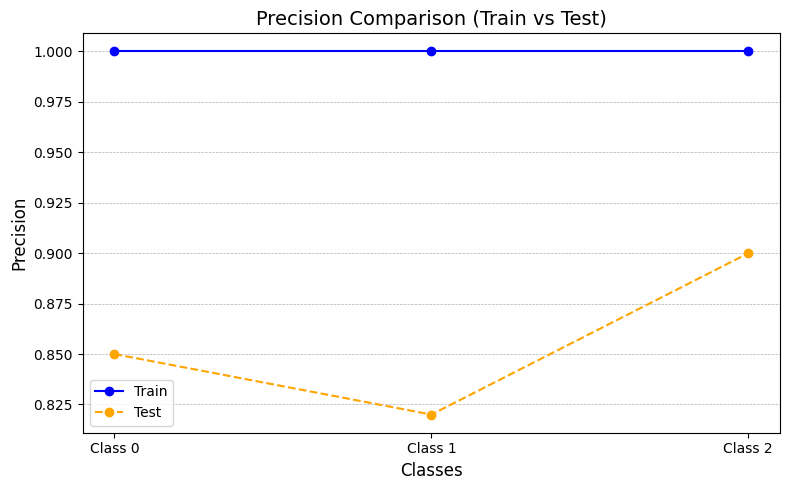

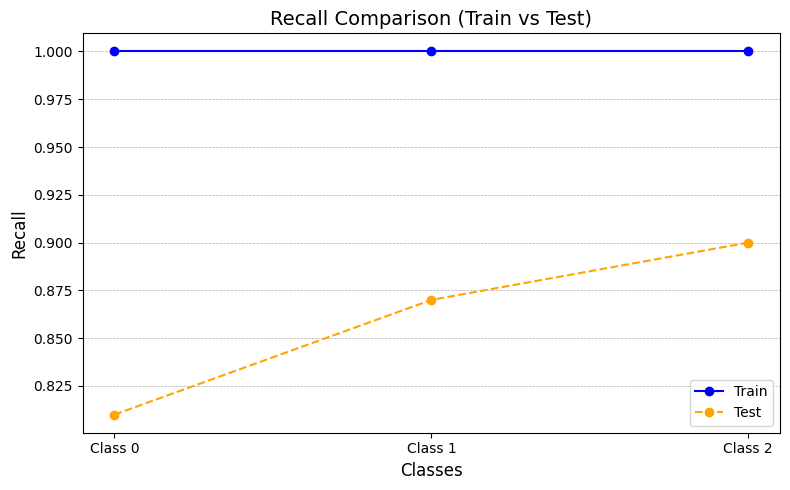

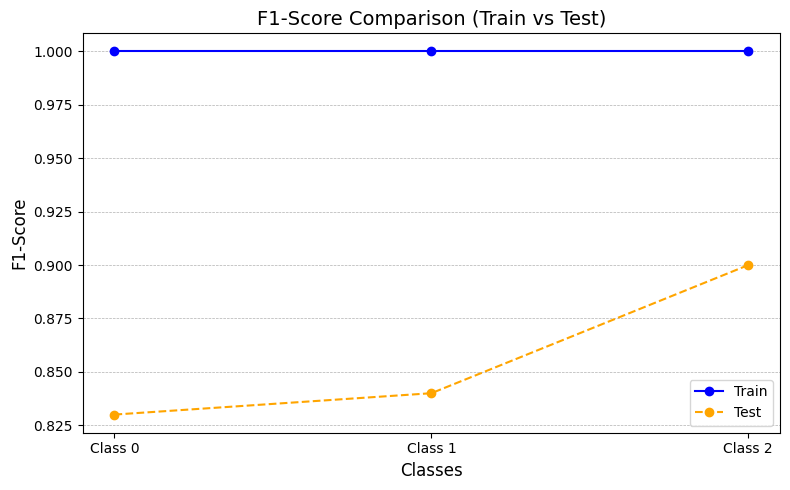

In [41]:
# Data from the classification report for Train and Test
labels = ['Class 0', 'Class 1', 'Class 2']
train_precision = [1.00, 1.00, 1.00]
train_recall = [1.00, 1.00, 1.00]
train_f1 = [1.00, 1.00, 1.00]

test_precision = [0.85, 0.82, 0.90]
test_recall = [0.81, 0.87, 0.90]
test_f1 = [0.83, 0.84, 0.90]

metrics = ['Precision', 'Recall', 'F1-Score']
train_metrics = [train_precision, train_recall, train_f1]
test_metrics = [test_precision, test_recall, test_f1]

# Plot Precision, Recall, and F1-Score as line graphs
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    plt.plot(labels, train_metrics[i], marker='o', label='Train', linestyle='-', color='blue')
    plt.plot(labels, test_metrics[i], marker='o', label='Test', linestyle='--', color='orange')

    plt.ylabel(metric, fontsize=12)
    plt.xlabel('Classes', fontsize=12)
    plt.title(f'{metric} Comparison (Train vs Test)', fontsize=14)
    plt.xticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()



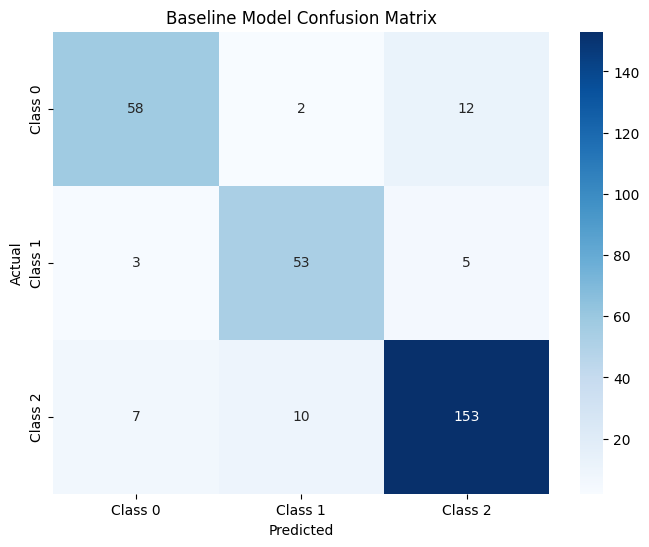

In [42]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_baseline)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Baseline Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Hyper Parameter tunning**

In [23]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Initialize CatBoost model with class weights and early stopping
catboost_model = CatBoostClassifier(
    random_state=42,
    verbose=0,
    class_weights=class_weights_dict,
    early_stopping_rounds=60,  # Early stopping
    l2_leaf_reg=30  # Increased regularization
)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [ 200, 300, 400, 500,700],  # Reduce iterations to control complexity
    'depth': [3, 4, 6, 8],  # Reduce depth to control complexity
    'learning_rate': [0.01, 0.05, 0.06, 0.08, 0.09],  # Use lower learning rates
    'loss_function': ['MultiClass']
}

# Initialize GridSearchCV with reduced complexity and early stopping
grid_search = GridSearchCV(estimator=catboost_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

grid_search.fit(X_train_reduced, y_train)

# Output the best parameters and the best accuracy score in percent
print("Best parameters found: ", grid_search.best_params_)

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train_reduced, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'depth': 3, 'iterations': 700, 'learning_rate': 0.08, 'loss_function': 'MultiClass'}


**Train & Test**

In [26]:
# Make predictions on the test set
y_test_pred = best_model.predict(X_test_reduced)
y_train_pred = best_model.predict(X_train_reduced)


**Evaluate the model**

In [27]:
# Calculate accuracy for both test and train sets
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f"Test Set Accuracy: {accuracy_test * 100:.2f}%")
print(f"Train Set Accuracy: {accuracy_train * 100:.2f}%")

# Check for overfitting
if accuracy_train - accuracy_test > 5:
    print("Warning: Possible overfitting detected. Consider further adjustments.")

# Classification report for the best model (Test Data)
print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))

# Classification report for the best model (Train Data)
print("\nClassification Report (Train Data):\n", classification_report(y_train, y_train_pred))





Test Set Accuracy: 90.10%
Train Set Accuracy: 95.04%

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        72
           1       0.82      0.98      0.90        61
           2       0.98      0.85      0.91       170

    accuracy                           0.90       303
   macro avg       0.88      0.93      0.90       303
weighted avg       0.91      0.90      0.90       303


Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       214
           1       0.90      1.00      0.95       184
           2       1.00      0.91      0.95       509

    accuracy                           0.95       907
   macro avg       0.93      0.97      0.95       907
weighted avg       0.96      0.95      0.95       907



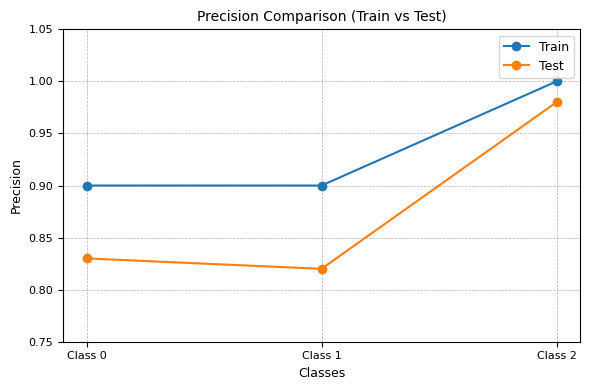

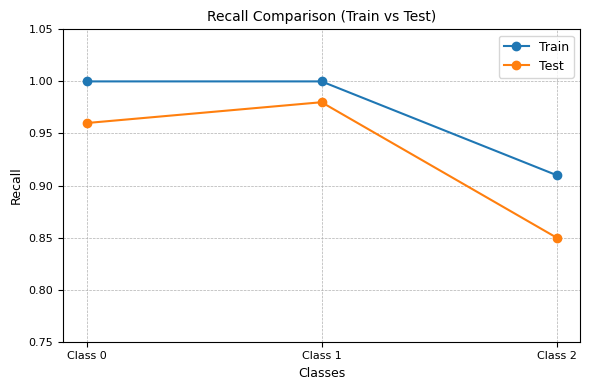

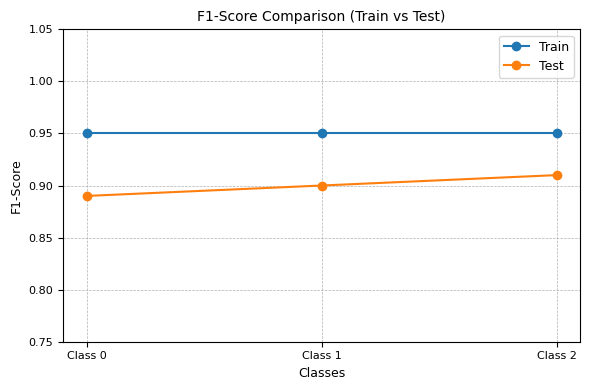

In [28]:
# Data from the classification report
labels = ['Class 0', 'Class 1', 'Class 2']
train_precision = [0.90, 0.90, 1.00]
train_recall = [1.00, 1.00, 0.91]
train_f1 = [0.95, 0.95, 0.95]

test_precision = [0.83, 0.82, 0.98]
test_recall = [0.96, 0.98, 0.85]
test_f1 = [0.89, 0.90, 0.91]

# Plotting precision, recall, and F1-score for Train vs Test
metrics = ['Precision', 'Recall', 'F1-Score']
train_metrics = [train_precision, train_recall, train_f1]
test_metrics = [test_precision, test_recall, test_f1]


for i, metric in enumerate(metrics):
    plt.figure(figsize=(6, 4))
    plt.plot(labels, train_metrics[i], label='Train', marker='o')
    plt.plot(labels, test_metrics[i], label='Test', marker='o')
    plt.title(f'{metric} Comparison (Train vs Test)', fontsize=10)
    plt.xlabel('Classes', fontsize=9)
    plt.ylabel(metric, fontsize=9)
    plt.ylim(0.75, 1.05)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(fontsize=9)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


**Confusion Matrix**

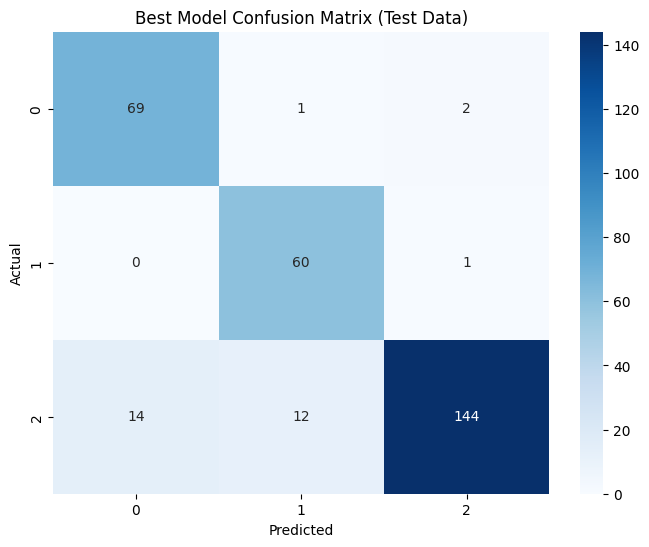

In [29]:
# Generate and plot the confusion matrix for the best model (Test Data)
conf_matrix_best = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Best Model Confusion Matrix (Test Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Compare with other Algorithms**

In [30]:
# Define the models in a dictionary
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'CatBoost': grid_search.best_estimator_  # Use the best CatBoost model from GridSearchCV
}

# Map the numerical class labels to actual class names
class_mapping = {0: 'Auditory', 1: 'Visual', 2: 'Kinesthetic'}

In [31]:
# Initialize lists to store results
model_names = []
class_names = []
precisions = []
recalls = []
f1_scores = []
accuracies = []
classification_reports = []
roc_curves = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_reduced, y_train)

    # Make predictions
    y_pred = model.predict(X_test_reduced)

    # Evaluate the model and extract classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store overall accuracy
    model_names.append(model_name)
    accuracies.append(accuracy * 100)
    classification_reports.append(report)

    for class_label, metrics in report.items():
        if class_label in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        class_name = class_mapping[int(class_label)]
        class_names.append(class_name)
        precisions.append(metrics['precision'])
        recalls.append(metrics['recall'])
        f1_scores.append(metrics['f1-score'])

    # Compute ROC curve and ROC area for each class
    if hasattr(model, "predict_proba"):
        try:
            probabilities = model.predict_proba(X_test_reduced)
            for i in range(len(model.classes_)):
                fpr, tpr, _ = roc_curve(y_test, probabilities[:, i], pos_label=model.classes_[i])
                roc_auc = auc(fpr, tpr)
                if model_name not in roc_curves:
                    roc_curves[model_name] = {}
                roc_curves[model_name][model.classes_[i]] = (fpr, tpr, roc_auc)
        except:
            print(f"Unable to compute ROC for {model_name} due to an unexpected issue with predict_proba.")

In [32]:
# Print classification reports
for i, model_name in enumerate(model_names):
    print(f"\n{model_name} Classification Report:\n", classification_report(y_test, models[model_name].predict(X_test_reduced)))



KNN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82        72
           1       0.76      0.61      0.67        61
           2       0.82      0.86      0.84       170

    accuracy                           0.81       303
   macro avg       0.79      0.77      0.78       303
weighted avg       0.80      0.81      0.80       303


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.46      0.55        72
           1       0.56      0.64      0.60        61
           2       0.76      0.82      0.79       170

    accuracy                           0.70       303
   macro avg       0.67      0.64      0.64       303
weighted avg       0.70      0.70      0.69       303


CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        72
           1       0.82    

<ipython-input-33-ab326c10b2ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis')


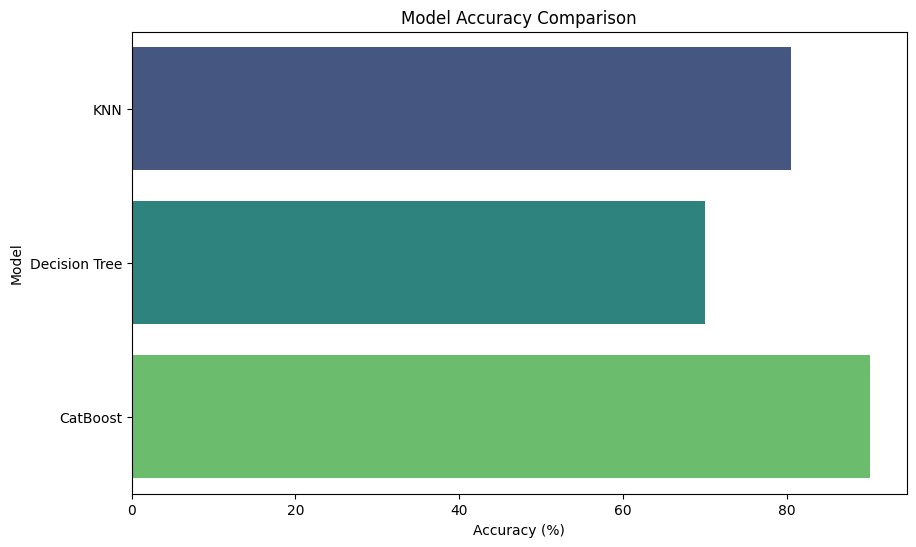

           Model   Accuracy
0            KNN  80.528053
1  Decision Tree  69.966997
2       CatBoost  90.099010


In [33]:
# Create a DataFrame to compare accuracies
comparison_df = pd.DataFrame({
    'Model': model_names[:len(models)],  # Ensure to use the first part of the expanded list
    'Accuracy': accuracies
})

# Plot accuracy comparison using horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Accuracy', y='Model', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.show()

print(comparison_df)



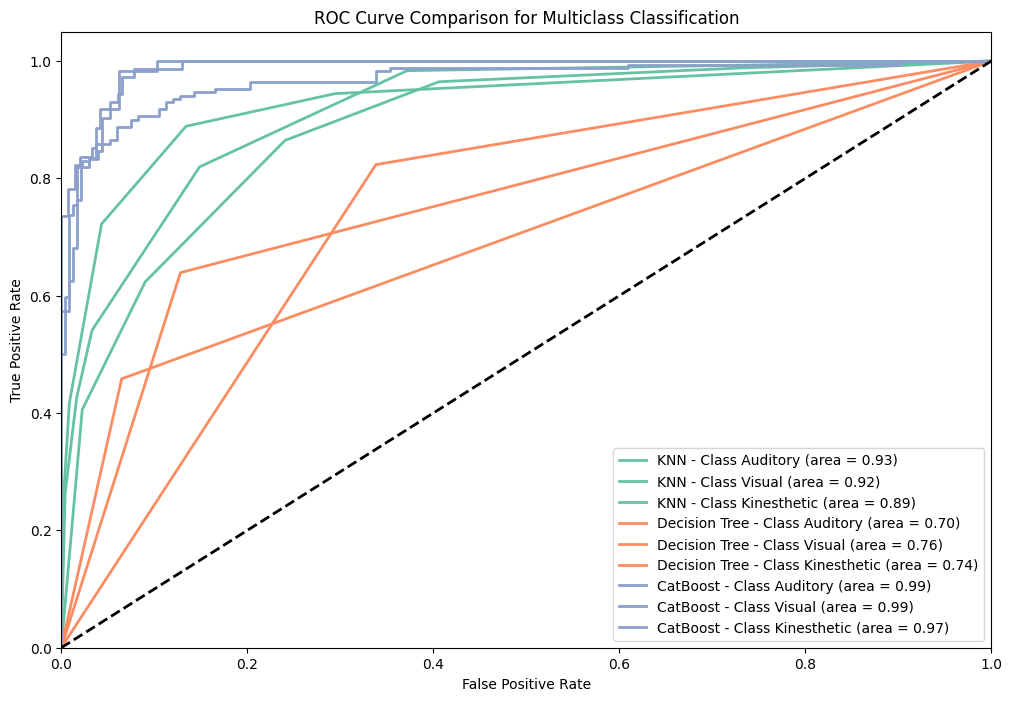

In [34]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Set2", len(models))  # Changed the color palette
for model_name, color in zip(roc_curves.keys(), colors):
    for class_label in roc_curves[model_name].keys():
        fpr, tpr, roc_auc = roc_curves[model_name][class_label]
        plt.plot(fpr, tpr, color=color, linestyle='-', linewidth=2, label=f'{model_name} - Class {class_mapping[int(class_label)]} (area = {roc_auc:.2f})')  # Changed linestyle and linewidth

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Changed color of the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for Multiclass Classification')
plt.legend(loc='lower right')
plt.show()
